## Content
* Dateetime parsing
* Resample (standardize/change sampling rate)
* Interpolate/fillna
* Rerange timestamp

In [ ]:
# data reference
# bpa data: https://transmission.bpa.gov/business/operations/wind/
# caiso data: http://www.caiso.com/Documents/OASIS-InterfaceSpecification_v5_1_1Clean_Fall2017Release.pdf

In [1]:
from pathlib import Path

In [2]:
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None

In [3]:
pd.__version__
# '1.3.4'

'1.3.4'

In [4]:
# using pathlib.Path for more ubiquitous path expression
pd.read_excel(Path('./data/WindGenTotalLoadYTD_2011.xls'), header=18).head(10)

,Date/Time,TOTAL WIND GENERATION BASEPOINT (FORECAST) IN BPA CONTROL AREA (MW; SCADA 103349),TOTAL WIND GENERATION IN BPA CONTROL AREA (MW; SCADA 79687),TOTAL BPA CONTROL AREA LOAD (MW; SCADA 45583),TOTAL HYDRO GENERATION (MW; SCADA 79682),TOTAL THERMAL GENERATION (MW; SCADA 79685),NET INTERCHANGE (MW; SCADA 45581)
0,01/01/11 00:00,260.0,310.000000,7343.0,7175.000000,4236.0,4278.0
1,01/01/11 00:05,263.0,310.000000,7293.0,7182.000000,4174.0,4274.0
2,01/01/11 00:10,274.0,309.000000,7287.0,7157.000000,4124.0,4204.0
3,01/01/11 00:15,274.0,303.666656,7274.0,7144.200195,4113.0,4188.0
4,01/01/11 00:20,274.0,310.000000,7300.0,7172.000000,4116.0,4199.0
5,01/01/11 00:25,274.0,310.000000,7244.0,7175.000000,4119.0,4260.0
6,01/01/11 00:30,274.0,301.000000,7265.0,7177.000000,4106.0,4219.0
7,01/01/11 00:35,274.0,293.399994,7229.0,7183.000000,4118.0,4267.0
8,01/01/11 00:40,274.0,285.000000,7258.0,7146.399902,4116.0,4190.0
9,01/01/11 00:45,274.0,282.000000,7234.0,7135.000000,4114.0,4197.0


In [5]:
# manually find the header and load as Pandas dataframe
df_bpa = pd.read_excel(Path('./data/WindGenTotalLoadYTD_2011.xls'), header=18)
df_bpa.head()

,Date/Time,TOTAL WIND GENERATION BASEPOINT (FORECAST) IN BPA CONTROL AREA (MW; SCADA 103349),TOTAL WIND GENERATION IN BPA CONTROL AREA (MW; SCADA 79687),TOTAL BPA CONTROL AREA LOAD (MW; SCADA 45583),TOTAL HYDRO GENERATION (MW; SCADA 79682),TOTAL THERMAL GENERATION (MW; SCADA 79685),NET INTERCHANGE (MW; SCADA 45581)
0,01/01/11 00:00,260.0,310.000000,7343.0,7175.000000,4236.0,4278.0
1,01/01/11 00:05,263.0,310.000000,7293.0,7182.000000,4174.0,4274.0
2,01/01/11 00:10,274.0,309.000000,7287.0,7157.000000,4124.0,4204.0
3,01/01/11 00:15,274.0,303.666656,7274.0,7144.200195,4113.0,4188.0
4,01/01/11 00:20,274.0,310.000000,7300.0,7172.000000,4116.0,4199.0


In [6]:
df_bpa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52116 entries, 0 to 52115
Data columns (total 7 columns):
 #   Column                                                                              Non-Null Count  Dtype  
---  ------                                                                              --------------  -----  
 0   Date/Time                                                                           52116 non-null  object 
 1   TOTAL WIND GENERATION  BASEPOINT (FORECAST) IN BPA CONTROL AREA (MW; SCADA 103349)  52111 non-null  float64
 2   TOTAL WIND GENERATION  IN BPA CONTROL AREA (MW; SCADA 79687)                        52111 non-null  float64
 3   TOTAL BPA CONTROL AREA LOAD (MW; SCADA 45583)                                       52111 non-null  float64
 4   TOTAL HYDRO GENERATION (MW; SCADA 79682)                                            52111 non-null  float64
 5   TOTAL THERMAL GENERATION (MW; SCADA 79685)                                          52111 non-nu

In [7]:
# inspect missing
df_bpa[df_bpa['TOTAL WIND GENERATION  BASEPOINT (FORECAST) IN BPA CONTROL AREA (MW; SCADA 103349)'].isna()]

,Date/Time,TOTAL WIND GENERATION BASEPOINT (FORECAST) IN BPA CONTROL AREA (MW; SCADA 103349),TOTAL WIND GENERATION IN BPA CONTROL AREA (MW; SCADA 79687),TOTAL BPA CONTROL AREA LOAD (MW; SCADA 45583),TOTAL HYDRO GENERATION (MW; SCADA 79682),TOTAL THERMAL GENERATION (MW; SCADA 79685),NET INTERCHANGE (MW; SCADA 45581)
11357,02/09/11 10:25,NaN,NaN,NaN,NaN,NaN,NaN
11675,02/10/11 12:55,NaN,NaN,NaN,NaN,NaN,NaN
15688,02/24/11 11:20,NaN,NaN,NaN,NaN,NaN,NaN
17404,03/02/11 10:20,NaN,NaN,NaN,NaN,NaN,NaN
47367,06/14/11 12:15,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df_bpa.columns

Index(['Date/Time',
       'TOTAL WIND GENERATION  BASEPOINT (FORECAST) IN BPA CONTROL AREA (MW; SCADA 103349)',
       'TOTAL WIND GENERATION  IN BPA CONTROL AREA (MW; SCADA 79687)',
       'TOTAL BPA CONTROL AREA LOAD (MW; SCADA 45583)',
       'TOTAL HYDRO GENERATION (MW; SCADA 79682)',
       'TOTAL THERMAL GENERATION (MW; SCADA 79685)',
       'NET INTERCHANGE (MW; SCADA 45581)'],
      dtype='object')

In [9]:
[col.lower() for col in df_bpa.columns]

['date/time',
 'total wind generation  basepoint (forecast) in bpa control area (mw; scada 103349)',
 'total wind generation  in bpa control area (mw; scada 79687)',
 'total bpa control area load (mw; scada 45583)',
 'total hydro generation (mw; scada 79682)',
 'total thermal generation (mw; scada 79685)',
 'net interchange (mw; scada 45581)']

In [10]:
["".join([ c.lower() if c.isalnum() else "_" for c in col ]) for col in df_bpa.columns]

['date_time',
 'total_wind_generation__basepoint__forecast__in_bpa_control_area__mw__scada_103349_',
 'total_wind_generation__in_bpa_control_area__mw__scada_79687_',
 'total_bpa_control_area_load__mw__scada_45583_',
 'total_hydro_generation__mw__scada_79682_',
 'total_thermal_generation__mw__scada_79685_',
 'net_interchange__mw__scada_45581_']

In [11]:
# rename column names
df_bpa.columns = ["".join([ c.lower() if c.isalnum() else "_" for c in col[:10] ]) for col in df_bpa.columns]
df_bpa.head()

,date_time,total_wind,total_wind,total_bpa_,total_hydr,total_ther,net_interc
0,01/01/11 00:00,260.0,310.000000,7343.0,7175.000000,4236.0,4278.0
1,01/01/11 00:05,263.0,310.000000,7293.0,7182.000000,4174.0,4274.0
2,01/01/11 00:10,274.0,309.000000,7287.0,7157.000000,4124.0,4204.0
3,01/01/11 00:15,274.0,303.666656,7274.0,7144.200195,4113.0,4188.0
4,01/01/11 00:20,274.0,310.000000,7300.0,7172.000000,4116.0,4199.0


In [12]:
# Pandas trick. Use column name as a method. Auto-complete support. 
# df_bpa.date_time vs. df_bpa['date_time']
df_bpa.date_time

0        01/01/11 00:00
1        01/01/11 00:05
2        01/01/11 00:10
3        01/01/11 00:15
4        01/01/11 00:20
              ...      
52111    06/30/11 23:35
52112    06/30/11 23:40
52113    06/30/11 23:45
52114    06/30/11 23:50
52115    06/30/11 23:55
Name: date_time, Length: 52116, dtype: object

In [13]:
# auto-parsing to datetime.
# note: the dtype. i.e., datetime64[ns]
pd.to_datetime(df_bpa.date_time)

0       2011-01-01 00:00:00
1       2011-01-01 00:05:00
2       2011-01-01 00:10:00
3       2011-01-01 00:15:00
4       2011-01-01 00:20:00
                ...        
52111   2011-06-30 23:35:00
52112   2011-06-30 23:40:00
52113   2011-06-30 23:45:00
52114   2011-06-30 23:50:00
52115   2011-06-30 23:55:00
Name: date_time, Length: 52116, dtype: datetime64[ns]

In [14]:
pd.to_datetime(df_bpa.date_time[0])

Timestamp('2011-01-01 00:00:00')

In [15]:
type(pd.to_datetime(df_bpa.date_time[0]))

pandas._libs.tslibs.timestamps.Timestamp

In [16]:
from datetime import datetime

In [17]:
from pandas._libs.tslibs.timestamps import Timestamp

"""
Docstring:     
Pandas replacement for python datetime.datetime object.

Timestamp is the pandas equivalent of python's Datetime
and is interchangeable with it in most cases. It's the type used
for the entries that make up a DatetimeIndex, and other timeseries
oriented data structures in pandas.
"""

"\nDocstring:     \nPandas replacement for python datetime.datetime object.\n\nTimestamp is the pandas equivalent of python's Datetime\nand is interchangeable with it in most cases. It's the type used\nfor the entries that make up a DatetimeIndex, and other timeseries\noriented data structures in pandas.\n"

In [18]:
df_bpa_demo = df_bpa[:1000].copy()
df_bpa_demo

,date_time,total_wind,total_wind,total_bpa_,total_hydr,total_ther,net_interc
0,01/01/11 00:00,260.0,310.000000,7343.0,7175.000000,4236.000000,4278.0
1,01/01/11 00:05,263.0,310.000000,7293.0,7182.000000,4174.000000,4274.0
2,01/01/11 00:10,274.0,309.000000,7287.0,7157.000000,4124.000000,4204.0
3,01/01/11 00:15,274.0,303.666656,7274.0,7144.200195,4113.000000,4188.0
4,01/01/11 00:20,274.0,310.000000,7300.0,7172.000000,4116.000000,4199.0
...,...,...,...,...,...,...,...
995,01/04/11 10:55,8.0,9.000000,8757.0,12010.000000,4367.000000,7429.0
996,01/04/11 11:00,8.0,8.000000,8745.0,12057.333008,4367.000000,7487.0
997,01/04/11 11:05,8.0,7.000000,8639.0,11921.000000,4353.000000,7442.0
998,01/04/11 11:10,9.0,9.200000,8631.0,11882.000000,4337.000000,7398.0


In [19]:
# datetime parsing
dt = pd.to_datetime(df_bpa_demo.date_time)
dt 

"""
pd.to_datetime(
    arg: 'DatetimeScalarOrArrayConvertible',
    errors: 'str' = 'raise',
    dayfirst: 'bool' = False,
    yearfirst: 'bool' = False,
    utc: 'bool | None' = None,
    format: 'str | None' = None,
    exact: 'bool' = True,
    unit: 'str | None' = None,
    infer_datetime_format: 'bool' = False,
    origin='unix',
    cache: 'bool' = True,
) -> 'DatetimeIndex | Series | DatetimeScalar | NaTType | None'

"""
# special attention for: 
# errors: 'str' = 'raise',
# utc: 'bool | None' = None,
# format: 'str | None' = None,

"\npd.to_datetime(\n    arg: 'DatetimeScalarOrArrayConvertible',\n    errors: 'str' = 'raise',\n    dayfirst: 'bool' = False,\n    yearfirst: 'bool' = False,\n    utc: 'bool | None' = None,\n    format: 'str | None' = None,\n    exact: 'bool' = True,\n    unit: 'str | None' = None,\n    infer_datetime_format: 'bool' = False,\n    origin='unix',\n    cache: 'bool' = True,\n) -> 'DatetimeIndex | Series | DatetimeScalar | NaTType | None'\n\n"

In [20]:
# to UTC
dt_utc = pd.to_datetime(df_bpa_demo.date_time, utc=True)
dt_utc

0     2011-01-01 00:00:00+00:00
1     2011-01-01 00:05:00+00:00
2     2011-01-01 00:10:00+00:00
3     2011-01-01 00:15:00+00:00
4     2011-01-01 00:20:00+00:00
                 ...           
995   2011-01-04 10:55:00+00:00
996   2011-01-04 11:00:00+00:00
997   2011-01-04 11:05:00+00:00
998   2011-01-04 11:10:00+00:00
999   2011-01-04 11:15:00+00:00
Name: date_time, Length: 1000, dtype: datetime64[ns, UTC]

In [21]:
# to UTC: 
# Q: what if the timezone representation is not at UTC? 
# (Assuming the expression is valid, assuming there is time zone indicator) 

# A: UTC means represent at UTC. It is a convention to avoid confusion. 
# People can choose to relocate to spcicific timezone from UTC
# Example: 2010-01-01 00:00:00-05:00 -> 2010-01-01 05:00:00+00:00

# Demo: 
print(pd.to_datetime('2010-01-01 00:00:00-05:00'))
print(pd.to_datetime('2010-01-01 00:00:00-05:00', utc=True))
pd.to_datetime('2010-01-01 00:00:00-05:00')

2010-01-01 00:00:00-05:00
2010-01-01 05:00:00+00:00


Timestamp('2010-01-01 00:00:00-0500', tz='pytz.FixedOffset(-300)')

In [22]:
# to UTC cont':
# Q: what if the actual timezone is not at UTC, and it does not have timezone indicator

# A: principle: need to format it into acceptable representation.
# i.e., 2010-01-01 00:00:00 + Newyork time zone -> 2010-01-01 00:00:00-05:00
# Depending on the situation, some tweeks might be required, e.g., string operation.

# Demo:
# ...

In [23]:
# Available timezones
import pytz

pytz.all_timezones[120:125]

['America/Guatemala',
 'America/Guayaquil',
 'America/Guyana',
 'America/Halifax',
 'America/Havana']

In [24]:
# UTC to non-UTC

# Demo
print("====Original at UTC")
print(pd.to_datetime(df_bpa_demo.date_time, utc=True).head())
print()


# Compare tz_localize vs. tz_convert
print("====Convert to non-UTC (same time, different representation)")
print(pd.to_datetime(df_bpa_demo.date_time, utc=True).dt.tz_convert(tz='Hongkong').head())
print()

print("====Reloccalize timezone (different time, i.e., time offset)")
# Note: the input need to be timezone-naive, i.e., no time zone info
print(pd.to_datetime(df_bpa_demo.date_time, utc=False).dt.tz_localize(tz='Hongkong').head())

# 0     2011-01-01 08:00:00+08:00
# 1     2011-01-01 08:05:00+08:00

# vs.

# 0     2011-01-01 00:00:00+08:00
# 1     2011-01-01 00:05:00+08:00

====Original at UTC
0   2011-01-01 00:00:00+00:00
1   2011-01-01 00:05:00+00:00
2   2011-01-01 00:10:00+00:00
3   2011-01-01 00:15:00+00:00
4   2011-01-01 00:20:00+00:00
Name: date_time, dtype: datetime64[ns, UTC]

====Convert to non-UTC (same time, different representation)
0   2011-01-01 08:00:00+08:00
1   2011-01-01 08:05:00+08:00
2   2011-01-01 08:10:00+08:00
3   2011-01-01 08:15:00+08:00
4   2011-01-01 08:20:00+08:00
Name: date_time, dtype: datetime64[ns, Hongkong]

====Reloccalize timezone (different time, i.e., time offset)
0   2011-01-01 00:00:00+08:00
1   2011-01-01 00:05:00+08:00
2   2011-01-01 00:10:00+08:00
3   2011-01-01 00:15:00+08:00
4   2011-01-01 00:20:00+08:00
Name: date_time, dtype: datetime64[ns, Hongkong]


### Tips: timezone is error-prone.
- use offset instead.
- https://github.com/pandas-dev/pandas/issues/30518
- https://pvlib-python.readthedocs.io/en/v0.3.2/timetimezones.html

### See a demo at the end:  The beast of American daylight saving time

In [25]:
# get tz info
# basically, GMT is UTC
[tz for tz in pytz.all_timezones if "gmt" in tz.lower()]

['Etc/GMT',
 'Etc/GMT+0',
 'Etc/GMT+1',
 'Etc/GMT+10',
 'Etc/GMT+11',
 'Etc/GMT+12',
 'Etc/GMT+2',
 'Etc/GMT+3',
 'Etc/GMT+4',
 'Etc/GMT+5',
 'Etc/GMT+6',
 'Etc/GMT+7',
 'Etc/GMT+8',
 'Etc/GMT+9',
 'Etc/GMT-0',
 'Etc/GMT-1',
 'Etc/GMT-10',
 'Etc/GMT-11',
 'Etc/GMT-12',
 'Etc/GMT-13',
 'Etc/GMT-14',
 'Etc/GMT-2',
 'Etc/GMT-3',
 'Etc/GMT-4',
 'Etc/GMT-5',
 'Etc/GMT-6',
 'Etc/GMT-7',
 'Etc/GMT-8',
 'Etc/GMT-9',
 'Etc/GMT0',
 'GMT',
 'GMT+0',
 'GMT-0',
 'GMT0']

## Resample 
- Essentially, resample = groupby duration 
- Note: resample need to work on timestamp data
- See a demo below

In [26]:
# resample on arbitary col
# this is a more flexible approach than resample on timestamp index

In [27]:
# create a intermediate col to store the utc timestamp 
# Note: resample based on time need to work on timestamp data
df_bpa_demo['dt_utc'] = pd.to_datetime(df_bpa_demo.date_time, utc=True)
df_bpa_demo.head()

,date_time,total_wind,total_wind,total_bpa_,total_hydr,total_ther,net_interc,dt_utc
0,01/01/11 00:00,260.0,310.000000,7343.0,7175.000000,4236.0,4278.0,2011-01-01 00:00:00+00:00
1,01/01/11 00:05,263.0,310.000000,7293.0,7182.000000,4174.0,4274.0,2011-01-01 00:05:00+00:00
2,01/01/11 00:10,274.0,309.000000,7287.0,7157.000000,4124.0,4204.0,2011-01-01 00:10:00+00:00
3,01/01/11 00:15,274.0,303.666656,7274.0,7144.200195,4113.0,4188.0,2011-01-01 00:15:00+00:00
4,01/01/11 00:20,274.0,310.000000,7300.0,7172.000000,4116.0,4199.0,2011-01-01 00:20:00+00:00


In [28]:
# demo: down-sample, resample then aggregate with mean
df_bpa_demo.resample(rule='60T', on='dt_utc', offset='0T').mean()

,total_wind,total_wind,total_bpa_,total_hydr,total_ther,net_interc
dt_utc,,,,,,
2011-01-01 00:00:00+00:00,271.083333,298.505554,7265.500000,7152.966675,4131.583333,4220.208333
2011-01-01 01:00:00+00:00,261.083333,212.066666,7189.000000,6881.555542,4179.633341,4078.333333
2011-01-01 02:00:00+00:00,178.083333,187.011111,7208.083333,6940.191650,4071.641663,3994.250000
2011-01-01 03:00:00+00:00,143.583333,244.500000,7269.000000,6931.433309,3826.716675,3877.458333
2011-01-01 04:00:00+00:00,183.333333,219.061110,7401.333333,6951.791667,3984.550008,4045.000000
...,...,...,...,...,...,...
2011-01-04 07:00:00+00:00,5.833333,5.083333,9545.500000,13406.061117,4330.216675,8196.166667
2011-01-04 08:00:00+00:00,6.000000,2.416667,9389.333333,13310.905599,4379.833333,8300.666667
2011-01-04 09:00:00+00:00,9.416667,1.666667,9147.250000,12629.577718,4347.277791,7644.250000


In [29]:
# demo: old fashioned use groupby
# ref: grouper: https://pandas.pydata.org/docs/reference/api/pandas.Grouper.html
df_bpa_demo.groupby(pd.Grouper(key='dt_utc', freq='60Min', base=30, label='right')).mean()

,total_wind,total_wind,total_bpa_,total_hydr,total_ther,net_interc
dt_utc,,,,,,
2011-01-01 00:30:00+00:00,269.833333,308.777776,7290.166667,7167.533366,4147.000000,4233.833333
2011-01-01 01:30:00+00:00,267.666667,261.649999,7218.333333,7018.088867,4142.166667,4149.875000
2011-01-01 02:30:00+00:00,221.416667,180.449999,7187.500000,6892.783325,4151.441671,4037.500000
2011-01-01 03:30:00+00:00,158.250000,225.344444,7237.833333,6940.158325,3928.750000,3925.208333
2011-01-01 04:30:00+00:00,161.916667,230.533333,7319.250000,6927.933309,3905.183350,3963.416667
...,...,...,...,...,...,...
2011-01-04 07:30:00+00:00,5.333333,9.333333,9423.416667,13039.777751,4319.125000,7945.083333
2011-01-04 08:30:00+00:00,6.000000,3.333333,9513.833333,13401.366699,4353.341675,8244.916667
2011-01-04 09:30:00+00:00,7.500000,1.500000,9255.166667,13011.600016,4364.875000,8032.083333


In [30]:
# demo: resample then aggregate with sum
df_bpa_demo.resample(rule='60T', on='dt_utc').sum()

,total_wind,total_wind,total_bpa_,total_hydr,total_ther,net_interc
dt_utc,,,,,,
2011-01-01 00:00:00+00:00,3253.0,3582.066650,87186.0,85835.600098,49579.000000,50642.5
2011-01-01 01:00:00+00:00,3133.0,2544.799988,86268.0,82578.666504,50155.600098,48940.0
2011-01-01 02:00:00+00:00,2137.0,2244.133331,86497.0,83282.299805,48859.699951,47931.0
2011-01-01 03:00:00+00:00,1723.0,2934.000000,87228.0,83177.199707,45920.600098,46529.5
2011-01-01 04:00:00+00:00,2200.0,2628.733322,88816.0,83421.500000,47814.600098,48540.0
...,...,...,...,...,...,...
2011-01-04 07:00:00+00:00,70.0,61.000000,114546.0,160872.733398,51962.600098,98354.0
2011-01-04 08:00:00+00:00,72.0,29.000000,112672.0,159730.867188,52558.000000,99608.0
2011-01-04 09:00:00+00:00,113.0,20.000000,109767.0,151554.932617,52167.333496,91731.0


In [31]:
# up-sample.
df_bpa_demo.resample(rule='1T', on='dt_utc').mean()

,total_wind,total_wind,total_bpa_,total_hydr,total_ther,net_interc
dt_utc,,,,,,
2011-01-01 00:00:00+00:00,260.0,310.0,7343.0,7175.0,4236.000000,4278.0
2011-01-01 00:01:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-01 00:02:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-01 00:03:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-01 00:04:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2011-01-04 11:11:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-04 11:12:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-04 11:13:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN


## Fillna for timeseries data
Interpolate works well for filling missing values in time series data, assuming the interval is the same.
ref:https://stackoverflow.com/questions/54985896/pandas-interpolate-time-vs-linear

In [32]:
# Demo: fillna
import numpy as np
df_bpa_demo_missing = df_bpa_demo[["net_interc", "dt_utc"]]
df_bpa_demo_missing
df_bpa_demo_missing["net_interc_missing"] = df_bpa_demo_missing.net_interc
df_bpa_demo_missing.at[[0, 2,3], "net_interc_missing"] = np.nan
# reset index using the timestamp 
# note: timestamp index might be easy to view, but generally hard to manipulate comparing to columns.
df_bpa_demo_missing.set_index("dt_utc", inplace=True)
df_bpa_demo_missing.head()

,net_interc,net_interc_missing
dt_utc,,
2011-01-01 00:00:00+00:00,4278.0,NaN
2011-01-01 00:05:00+00:00,4274.0,4274.0
2011-01-01 00:10:00+00:00,4204.0,NaN
2011-01-01 00:15:00+00:00,4188.0,NaN
2011-01-01 00:20:00+00:00,4199.0,4199.0


In [33]:
df_bpa_demo_missing['fillna'] = df_bpa_demo_missing.net_interc_missing.interpolate(limit_direction='both', limit=None)
df_bpa_demo_missing['error'] = abs(df_bpa_demo_missing['fillna']-df_bpa_demo_missing['net_interc'])/df_bpa_demo_missing['net_interc']
df_bpa_demo_missing

,net_interc,net_interc_missing,fillna,error
dt_utc,,,,
2011-01-01 00:00:00+00:00,4278.0,NaN,4274.0,0.000935
2011-01-01 00:05:00+00:00,4274.0,4274.0,4274.0,0.000000
2011-01-01 00:10:00+00:00,4204.0,NaN,4249.0,0.010704
2011-01-01 00:15:00+00:00,4188.0,NaN,4224.0,0.008596
2011-01-01 00:20:00+00:00,4199.0,4199.0,4199.0,0.000000
...,...,...,...,...
2011-01-04 10:55:00+00:00,7429.0,7429.0,7429.0,0.000000
2011-01-04 11:00:00+00:00,7487.0,7487.0,7487.0,0.000000
2011-01-04 11:05:00+00:00,7442.0,7442.0,7442.0,0.000000


In [34]:
# comparison, using mean fillna
df_bpa_demo_missing['fillna_mean'] = df_bpa_demo_missing.net_interc_missing.fillna(df_bpa_demo_missing.net_interc_missing.mean())
df_bpa_demo_missing['error_mean'] = abs(df_bpa_demo_missing['fillna_mean']-df_bpa_demo_missing['net_interc'])/df_bpa_demo_missing['net_interc']
df_bpa_demo_missing

,net_interc,net_interc_missing,fillna,error,fillna_mean,error_mean
dt_utc,,,,,,
2011-01-01 00:00:00+00:00,4278.0,NaN,4274.0,0.000935,5905.587429,0.380455
2011-01-01 00:05:00+00:00,4274.0,4274.0,4274.0,0.000000,4274.000000,0.000000
2011-01-01 00:10:00+00:00,4204.0,NaN,4249.0,0.010704,5905.587429,0.404754
2011-01-01 00:15:00+00:00,4188.0,NaN,4224.0,0.008596,5905.587429,0.410121
2011-01-01 00:20:00+00:00,4199.0,4199.0,4199.0,0.000000,4199.000000,0.000000
...,...,...,...,...,...,...
2011-01-04 10:55:00+00:00,7429.0,7429.0,7429.0,0.000000,7429.000000,0.000000
2011-01-04 11:00:00+00:00,7487.0,7487.0,7487.0,0.000000,7487.000000,0.000000
2011-01-04 11:05:00+00:00,7442.0,7442.0,7442.0,0.000000,7442.000000,0.000000


### Observation
By using interpolatation, the fillna error is (around 1%) is much lower than using fillna with mean (around 40%.)

## Rerange timestamp
* Motivation: Desire timeseries data in a format that
    * start with certain time
    * end at certain time
    * has consistent interval
* Feature advantages
    * Using time range is less error-prone and more redable than manually add row.
    * Using time range is more flexible and controllable than resample.
* Demo: see the following example

In [35]:
# example
# 	date_time	total_wind	total_wind	total_bpa_	total_hydr	total_ther	net_interc	dt_utc
    
    
# 2	01/01/11 00:10	274.0	309.000000	7287.0	7157.000000	4124.0	4204.0	2011-01-01 00:10:00+00:00
# 3	01/01/11 00:15	274.0	303.666656	7274.0	7144.200195	4113.0	4188.0	2011-01-01 00:15:00+00:00
# 4	01/01/11 00:20	274.0	310.000000	7300.0	7172.000000	4116.0	4199.0	2011-01-01 00:20:00+00:00

# --> 

# 	date_time	total_wind	total_wind	total_bpa_	total_hydr	total_ther	net_interc	dt_utc
# 0	01/01/11 00:00	260.0	310.000000	7343.0	7175.000000	4236.0	4278.0	2011-01-01 00:00:00+00:00
# 1	01/01/11 00:05	263.0	310.000000	7293.0	7182.000000	4174.0	4274.0	2011-01-01 00:05:00+00:00
# 2	01/01/11 00:10	274.0	309.000000	7287.0	7157.000000	4124.0	4204.0	2011-01-01 00:10:00+00:00
# 3	01/01/11 00:15	274.0	303.666656	7274.0	7144.200195	4113.0	4188.0	2011-01-01 00:15:00+00:00
# 4	01/01/11 00:20	274.0	310.000000	7300.0	7172.000000	4116.0	4199.0	2011-01-01 00:20:00+00:00
# 5	01/01/11 00:25	274.0	310.000000	7244.0	7175.000000	4119.0	4260.0	2011-01-01 00:25:00+00:00
# 6	01/01/11 00:30	274.0	301.000000	7265.0	7177.000000	4106.0	4219.0	2011-01-01 00:30:00+00:00

In [36]:
df_bpa_demo.head(10)

,date_time,total_wind,total_wind,total_bpa_,total_hydr,total_ther,net_interc,dt_utc
0,01/01/11 00:00,260.0,310.000000,7343.0,7175.000000,4236.0,4278.0,2011-01-01 00:00:00+00:00
1,01/01/11 00:05,263.0,310.000000,7293.0,7182.000000,4174.0,4274.0,2011-01-01 00:05:00+00:00
2,01/01/11 00:10,274.0,309.000000,7287.0,7157.000000,4124.0,4204.0,2011-01-01 00:10:00+00:00
3,01/01/11 00:15,274.0,303.666656,7274.0,7144.200195,4113.0,4188.0,2011-01-01 00:15:00+00:00
4,01/01/11 00:20,274.0,310.000000,7300.0,7172.000000,4116.0,4199.0,2011-01-01 00:20:00+00:00
5,01/01/11 00:25,274.0,310.000000,7244.0,7175.000000,4119.0,4260.0,2011-01-01 00:25:00+00:00
6,01/01/11 00:30,274.0,301.000000,7265.0,7177.000000,4106.0,4219.0,2011-01-01 00:30:00+00:00
7,01/01/11 00:35,274.0,293.399994,7229.0,7183.000000,4118.0,4267.0,2011-01-01 00:35:00+00:00
8,01/01/11 00:40,274.0,285.000000,7258.0,7146.399902,4116.0,4190.0,2011-01-01 00:40:00+00:00
9,01/01/11 00:45,274.0,282.000000,7234.0,7135.000000,4114.0,4197.0,2011-01-01 00:45:00+00:00


In [37]:
# drop some rows for demo purpose
df_bpa_demo_drop = df_bpa_demo.drop(axis=0, labels=[0, 1, 5, 6, 7])
df_bpa_demo_drop.head(10)

,date_time,total_wind,total_wind,total_bpa_,total_hydr,total_ther,net_interc,dt_utc
2,01/01/11 00:10,274.0,309.000000,7287.0,7157.000000,4124.0,4204.0,2011-01-01 00:10:00+00:00
3,01/01/11 00:15,274.0,303.666656,7274.0,7144.200195,4113.0,4188.0,2011-01-01 00:15:00+00:00
4,01/01/11 00:20,274.0,310.000000,7300.0,7172.000000,4116.0,4199.0,2011-01-01 00:20:00+00:00
8,01/01/11 00:40,274.0,285.000000,7258.0,7146.399902,4116.0,4190.0,2011-01-01 00:40:00+00:00
9,01/01/11 00:45,274.0,282.000000,7234.0,7135.000000,4114.0,4197.0,2011-01-01 00:45:00+00:00
10,01/01/11 00:50,274.0,291.000000,7238.0,7124.000000,4114.0,4191.0,2011-01-01 00:50:00+00:00
11,01/01/11 00:55,264.0,277.000000,7221.0,7065.000000,4129.0,4175.5,2011-01-01 00:55:00+00:00
12,01/01/11 01:00,262.0,272.000000,7192.0,6988.000000,4157.0,4175.0,2011-01-01 01:00:00+00:00
13,01/01/11 01:05,260.0,257.000000,7218.0,6942.000000,4142.0,4098.0,2011-01-01 01:05:00+00:00
14,01/01/11 01:10,264.0,241.000000,7210.0,6901.000000,4153.0,4084.0,2011-01-01 01:10:00+00:00


In [38]:
# new range
start = pd.to_datetime("2011-01-01 00:00:00+00:00")
end = pd.to_datetime("2011-01-01 00:30:00+00:00")
time_range_new = pd.date_range(start=start,
                               end=end,
                               periods= None,
                               freq="5T",)
time_range_new

DatetimeIndex(['2011-01-01 00:00:00+00:00', '2011-01-01 00:05:00+00:00',
               '2011-01-01 00:10:00+00:00', '2011-01-01 00:15:00+00:00',
               '2011-01-01 00:20:00+00:00', '2011-01-01 00:25:00+00:00',
               '2011-01-01 00:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='5T')

In [39]:
# Outer join (using merge)
# prepare a series for join operation
pd.Series(time_range_new, name='dt_utc') 
# outer join (note: index is reorder, dt_utc required reorder)
df_bpa_demo_rerange = pd.merge(df_bpa_demo_drop, pd.Series(time_range_new, name='dt_utc'), how='outer',
        on='dt_utc')
df_bpa_demo_rerange

,date_time,total_wind,total_wind,total_bpa_,total_hydr,total_ther,net_interc,dt_utc
0,01/01/11 00:10,274.0,309.000000,7287.0,7157.000000,4124.000000,4204.0,2011-01-01 00:10:00+00:00
1,01/01/11 00:15,274.0,303.666656,7274.0,7144.200195,4113.000000,4188.0,2011-01-01 00:15:00+00:00
2,01/01/11 00:20,274.0,310.000000,7300.0,7172.000000,4116.000000,4199.0,2011-01-01 00:20:00+00:00
3,01/01/11 00:40,274.0,285.000000,7258.0,7146.399902,4116.000000,4190.0,2011-01-01 00:40:00+00:00
4,01/01/11 00:45,274.0,282.000000,7234.0,7135.000000,4114.000000,4197.0,2011-01-01 00:45:00+00:00
...,...,...,...,...,...,...,...,...
994,01/04/11 11:15,9.0,12.000000,8632.0,11917.000000,4353.399902,7451.5,2011-01-04 11:15:00+00:00
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-01-01 00:00:00+00:00
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-01-01 00:05:00+00:00
997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-01-01 00:25:00+00:00


In [40]:
df_bpa_demo_rerange.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999 entries, 0 to 998
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   date_time   995 non-null    object             
 1   total_wind  995 non-null    float64            
 2   total_wind  995 non-null    float64            
 3   total_bpa_  995 non-null    float64            
 4   total_hydr  995 non-null    float64            
 5   total_ther  995 non-null    float64            
 6   net_interc  995 non-null    float64            
 7   dt_utc      999 non-null    datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), float64(6), object(1)
memory usage: 70.2+ KB


In [41]:
# sort the new rerange column
df_bpa_demo_rerange.sort_values('dt_utc').head(10)

,date_time,total_wind,total_wind,total_bpa_,total_hydr,total_ther,net_interc,dt_utc
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-01-01 00:00:00+00:00
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-01-01 00:05:00+00:00
0,01/01/11 00:10,274.0,309.000000,7287.0,7157.000000,4124.0,4204.0,2011-01-01 00:10:00+00:00
1,01/01/11 00:15,274.0,303.666656,7274.0,7144.200195,4113.0,4188.0,2011-01-01 00:15:00+00:00
2,01/01/11 00:20,274.0,310.000000,7300.0,7172.000000,4116.0,4199.0,2011-01-01 00:20:00+00:00
997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-01-01 00:25:00+00:00
998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-01-01 00:30:00+00:00
3,01/01/11 00:40,274.0,285.000000,7258.0,7146.399902,4116.0,4190.0,2011-01-01 00:40:00+00:00
4,01/01/11 00:45,274.0,282.000000,7234.0,7135.000000,4114.0,4197.0,2011-01-01 00:45:00+00:00
5,01/01/11 00:50,274.0,291.000000,7238.0,7124.000000,4114.0,4191.0,2011-01-01 00:50:00+00:00


In [42]:
# (optional: reset the index, i.e., from 0 to 999)
df_bpa_demo_rerange.sort_values('dt_utc').reset_index(drop=True).head(10)

,date_time,total_wind,total_wind,total_bpa_,total_hydr,total_ther,net_interc,dt_utc
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-01-01 00:00:00+00:00
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-01-01 00:05:00+00:00
2,01/01/11 00:10,274.0,309.000000,7287.0,7157.000000,4124.0,4204.0,2011-01-01 00:10:00+00:00
3,01/01/11 00:15,274.0,303.666656,7274.0,7144.200195,4113.0,4188.0,2011-01-01 00:15:00+00:00
4,01/01/11 00:20,274.0,310.000000,7300.0,7172.000000,4116.0,4199.0,2011-01-01 00:20:00+00:00
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-01-01 00:25:00+00:00
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-01-01 00:30:00+00:00
7,01/01/11 00:40,274.0,285.000000,7258.0,7146.399902,4116.0,4190.0,2011-01-01 00:40:00+00:00
8,01/01/11 00:45,274.0,282.000000,7234.0,7135.000000,4114.0,4197.0,2011-01-01 00:45:00+00:00
9,01/01/11 00:50,274.0,291.000000,7238.0,7124.000000,4114.0,4191.0,2011-01-01 00:50:00+00:00


<AxesSubplot:xlabel='dt_utc'>

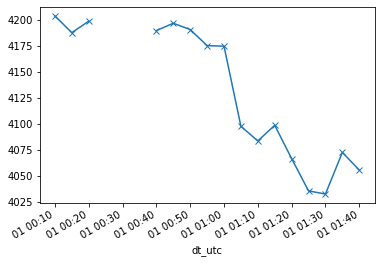

In [43]:
# bonus: plot
df_plot = df_bpa_demo_rerange.sort_values('dt_utc').reset_index(drop=True).head(20).set_index('dt_utc')["net_interc"]
df_plot.plot(marker = 'x')

<AxesSubplot:>

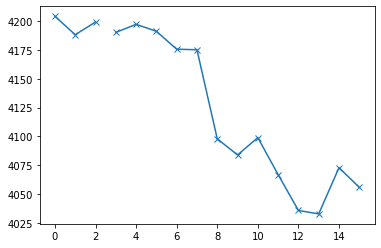

In [44]:
df_bpa_demo_rerange.sort_values('dt_utc').net_interc.head(20).plot(marker = 'x')

In [45]:
df_bpa_demo_drop

,date_time,total_wind,total_wind,total_bpa_,total_hydr,total_ther,net_interc,dt_utc
2,01/01/11 00:10,274.0,309.000000,7287.0,7157.000000,4124.000000,4204.0,2011-01-01 00:10:00+00:00
3,01/01/11 00:15,274.0,303.666656,7274.0,7144.200195,4113.000000,4188.0,2011-01-01 00:15:00+00:00
4,01/01/11 00:20,274.0,310.000000,7300.0,7172.000000,4116.000000,4199.0,2011-01-01 00:20:00+00:00
8,01/01/11 00:40,274.0,285.000000,7258.0,7146.399902,4116.000000,4190.0,2011-01-01 00:40:00+00:00
9,01/01/11 00:45,274.0,282.000000,7234.0,7135.000000,4114.000000,4197.0,2011-01-01 00:45:00+00:00
...,...,...,...,...,...,...,...,...
995,01/04/11 10:55,8.0,9.000000,8757.0,12010.000000,4367.000000,7429.0,2011-01-04 10:55:00+00:00
996,01/04/11 11:00,8.0,8.000000,8745.0,12057.333008,4367.000000,7487.0,2011-01-04 11:00:00+00:00
997,01/04/11 11:05,8.0,7.000000,8639.0,11921.000000,4353.000000,7442.0,2011-01-04 11:05:00+00:00
998,01/04/11 11:10,9.0,9.200000,8631.0,11882.000000,4337.000000,7398.0,2011-01-04 11:10:00+00:00


<AxesSubplot:xlabel='dt_utc'>

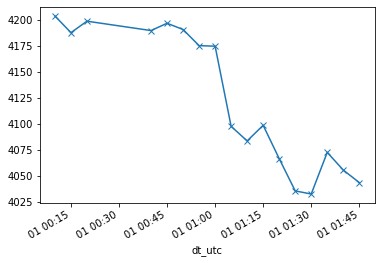

In [46]:
# plot without rearrange
df_plot_compare = df_bpa_demo_drop.head(20-3).set_index('dt_utc')["net_interc"]
df_plot_compare.plot(marker = 'x')

## (Bonus) The beast of American daylight saving time

In [48]:
# Motivation: demo of dayligth saving time from a real example
df_caiso = pd.read_csv(Path("./data/caiso_dam_from_API_2010-2021.csv"))
df_caiso.head()

# Note from the following 
# 2011-03-13 02:00:00 is missing
# but timezone offset change from -8:00 to -07:00
df_caiso[df_caiso.Time.str.contains("2011-03-13 0")]

,Time,MW
10440,2011-03-13 00:00:00-08:00,20102.05
10441,2011-03-13 01:00:00-08:00,19306.18
10442,2011-03-13 03:00:00-07:00,18727.17
10443,2011-03-13 04:00:00-07:00,18762.24
10444,2011-03-13 05:00:00-07:00,19261.33
10445,2011-03-13 06:00:00-07:00,19711.19
10446,2011-03-13 07:00:00-07:00,20440.18
10447,2011-03-13 08:00:00-07:00,21092.52
10448,2011-03-13 09:00:00-07:00,21771.79


In [49]:
# dt_los = pd.to_datetime(df_bpa_demo.date_time, utc=True).dt.tz_convert(tz='America/Los_Angeles')
dt_los = pd.to_datetime(df_bpa.date_time, utc=True).dt.tz_convert(tz='America/Los_Angeles')
dt_los

0       2010-12-31 16:00:00-08:00
1       2010-12-31 16:05:00-08:00
2       2010-12-31 16:10:00-08:00
3       2010-12-31 16:15:00-08:00
4       2010-12-31 16:20:00-08:00
                   ...           
52111   2011-06-30 16:35:00-07:00
52112   2011-06-30 16:40:00-07:00
52113   2011-06-30 16:45:00-07:00
52114   2011-06-30 16:50:00-07:00
52115   2011-06-30 16:55:00-07:00
Name: date_time, Length: 52116, dtype: datetime64[ns, America/Los_Angeles]

In [50]:
# los_angles local time does not have 2011-03-13 02:00 due to the daylight saving time
# google "2011 daylight savings time"
# then narrow down to 2011-03-13 01:00:00
dt_los[dt_los.apply(lambda x: str(x)).str.contains("2011-03-13 01")] 
dt_los[20544: 20544+12*2]

20544   2011-03-13 01:00:00-08:00
20545   2011-03-13 01:05:00-08:00
20546   2011-03-13 01:10:00-08:00
20547   2011-03-13 01:15:00-08:00
20548   2011-03-13 01:20:00-08:00
20549   2011-03-13 01:25:00-08:00
20550   2011-03-13 01:30:00-08:00
20551   2011-03-13 01:35:00-08:00
20552   2011-03-13 01:40:00-08:00
20553   2011-03-13 01:45:00-08:00
20554   2011-03-13 01:50:00-08:00
20555   2011-03-13 01:55:00-08:00
20556   2011-03-13 03:00:00-07:00
20557   2011-03-13 03:05:00-07:00
20558   2011-03-13 03:10:00-07:00
20559   2011-03-13 03:15:00-07:00
20560   2011-03-13 03:20:00-07:00
20561   2011-03-13 03:25:00-07:00
20562   2011-03-13 03:30:00-07:00
20563   2011-03-13 03:35:00-07:00
20564   2011-03-13 03:40:00-07:00
20565   2011-03-13 03:45:00-07:00
20566   2011-03-13 03:50:00-07:00
20567   2011-03-13 03:55:00-07:00
Name: date_time, dtype: datetime64[ns, America/Los_Angeles]

In [51]:
# dt_gmtplus8 = pd.to_datetime(df_bpa_demo.date_time, utc=True).dt.tz_convert(tz='Etc/gmt+8')
dt_gmtplus8 = pd.to_datetime(df_bpa.date_time, utc=True).dt.tz_convert(tz='Etc/gmt+8')
dt_gmtplus8

0       2010-12-31 16:00:00-08:00
1       2010-12-31 16:05:00-08:00
2       2010-12-31 16:10:00-08:00
3       2010-12-31 16:15:00-08:00
4       2010-12-31 16:20:00-08:00
                   ...           
52111   2011-06-30 15:35:00-08:00
52112   2011-06-30 15:40:00-08:00
52113   2011-06-30 15:45:00-08:00
52114   2011-06-30 15:50:00-08:00
52115   2011-06-30 15:55:00-08:00
Name: date_time, Length: 52116, dtype: datetime64[ns, Etc/GMT+8]

In [52]:
dt_gmtplus8[20544: 20544+12*2]

20544   2011-03-13 01:00:00-08:00
20545   2011-03-13 01:05:00-08:00
20546   2011-03-13 01:10:00-08:00
20547   2011-03-13 01:15:00-08:00
20548   2011-03-13 01:20:00-08:00
20549   2011-03-13 01:25:00-08:00
20550   2011-03-13 01:30:00-08:00
20551   2011-03-13 01:35:00-08:00
20552   2011-03-13 01:40:00-08:00
20553   2011-03-13 01:45:00-08:00
20554   2011-03-13 01:50:00-08:00
20555   2011-03-13 01:55:00-08:00
20556   2011-03-13 02:00:00-08:00
20557   2011-03-13 02:05:00-08:00
20558   2011-03-13 02:10:00-08:00
20559   2011-03-13 02:15:00-08:00
20560   2011-03-13 02:20:00-08:00
20561   2011-03-13 02:25:00-08:00
20562   2011-03-13 02:30:00-08:00
20563   2011-03-13 02:35:00-08:00
20564   2011-03-13 02:40:00-08:00
20565   2011-03-13 02:45:00-08:00
20566   2011-03-13 02:50:00-08:00
20567   2011-03-13 02:55:00-08:00
Name: date_time, dtype: datetime64[ns, Etc/GMT+8]

### Key takeaways
- Timezone info is not normally shipped with csv/excel data itself, making it very hard to get the timezone info correct at the first sight.
    - e.g., "Etc/gmt+8" is not the same as "America/Los_Angeles" due to daylight saving time.
    - Besides reading the documentation, go to the moment that daylight saving time switch to confirm, e.g., 2011 daylight savings time is 2011-03-11 02:00:00
- The priniciple is: we don't need the exact timezone info (e.g., "Etc/gmt+8" or "America/Los_Angeles".) As long as we have the consistent local time + timezone offset we are good.

In [53]:
# not a problem in hongkong
# dt_los = pd.to_datetime(df_bpa_demo.date_time, utc=True).dt.tz_convert(tz='hongkong')
dt_hongkong = pd.to_datetime(df_bpa.date_time, utc=True).dt.tz_convert(tz='hongkong')
# dt_hongkong[dt_hongkong.apply(lambda x: str(x)).str.contains("2011-03-13 01")] 
dt_hongkong[20364: 20364+12*2]

20364   2011-03-13 01:00:00+08:00
20365   2011-03-13 01:05:00+08:00
20366   2011-03-13 01:10:00+08:00
20367   2011-03-13 01:15:00+08:00
20368   2011-03-13 01:20:00+08:00
20369   2011-03-13 01:25:00+08:00
20370   2011-03-13 01:30:00+08:00
20371   2011-03-13 01:35:00+08:00
20372   2011-03-13 01:40:00+08:00
20373   2011-03-13 01:45:00+08:00
20374   2011-03-13 01:50:00+08:00
20375   2011-03-13 01:55:00+08:00
20376   2011-03-13 02:00:00+08:00
20377   2011-03-13 02:05:00+08:00
20378   2011-03-13 02:10:00+08:00
20379   2011-03-13 02:15:00+08:00
20380   2011-03-13 02:20:00+08:00
20381   2011-03-13 02:25:00+08:00
20382   2011-03-13 02:30:00+08:00
20383   2011-03-13 02:35:00+08:00
20384   2011-03-13 02:40:00+08:00
20385   2011-03-13 02:45:00+08:00
20386   2011-03-13 02:50:00+08:00
20387   2011-03-13 02:55:00+08:00
Name: date_time, dtype: datetime64[ns, Hongkong]

In [54]:
# Motivation: demo of dayligth saving time from a real example
df_caiso = pd.read_csv(Path("./data/caiso_dam_from_API_2010-2021.csv"))
df_caiso.head()

# Note from the following 
# 2011-03-13 02:00:00 is missing
# but timezone offset change from -8:00 to -07:00
df_caiso[df_caiso.Time.str.contains("2011-03-13 0")]

,Time,MW
10440,2011-03-13 00:00:00-08:00,20102.05
10441,2011-03-13 01:00:00-08:00,19306.18
10442,2011-03-13 03:00:00-07:00,18727.17
10443,2011-03-13 04:00:00-07:00,18762.24
10444,2011-03-13 05:00:00-07:00,19261.33
10445,2011-03-13 06:00:00-07:00,19711.19
10446,2011-03-13 07:00:00-07:00,20440.18
10447,2011-03-13 08:00:00-07:00,21092.52
10448,2011-03-13 09:00:00-07:00,21771.79
